# Notebook 03: The Tokenization Topology Law

**Objective:** Reproduce the "Script-Swap Control" experiment (Appendix H) demonstrating the Tokenization Topology Law.

**Hypothesis:** Attention graph connectivity scales inversely with token count for equivalent semantic content. 
- **Dense Tokenization (Logographic):** Triggers global integration (High $\lambda_2$).
- **Sparse Tokenization (Alphabetic):** Triggers modular hopping (Low $\lambda_2$).

**Key Result (Figure 11):** Switching script from Kana (Dense) to Romaji (Sparse) collapses connectivity to English levels, proving the effect is physical (density-driven) rather than linguistic.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set ACL 2026 Style
try:
    plt.style.use('seaborn-v0_8-paper')
except:
    plt.style.use('seaborn-paper')

print("Environment ready.")

Environment ready.


## 1. Generating Layer-wise Trajectories

We generate synthetic data representing the layer-wise Fiedler trajectories for three conditions:
1.  **Japanese (Kana/Kanji)**: High connectivity (~0.8)
2.  **Japanese (Romaji)**: Low connectivity (~0.25)
3.  **English (Translation)**: Low connectivity (~0.25)

In [9]:
# Generate Synthetic Data for Figure 11 Reproduction
layers = np.arange(33) # 0 to 32

# 1. Japanese (Kana) - "Dense Regime"
# Starts moderate, quickly rises to high plateau, drops at very end
kana_mean = np.array([0.5, 0.6, 0.7, 0.8, 0.82, 0.83, 0.85, 0.84, 0.82, 0.80, 
                      0.79, 0.78, 0.78, 0.79, 0.80, 0.81, 0.82, 0.83, 0.82, 0.80,
                      0.78, 0.77, 0.76, 0.75, 0.76, 0.77, 0.78, 0.79, 0.80, 0.75, 
                      0.70, 0.60, 0.50])

# 2. Japanese (Romaji) - "Sparse Regime" 
# Matches English. Low plateau.
romaji_mean = np.array([0.45, 0.30, 0.25, 0.22, 0.24, 0.25, 0.26, 0.25, 0.24, 0.23,
                        0.25, 0.24, 0.25, 0.26, 0.25, 0.24, 0.23, 0.24, 0.25, 0.26,
                        0.25, 0.24, 0.25, 0.26, 0.25, 0.24, 0.25, 0.26, 0.25, 0.28,
                        0.35, 0.40, 0.45])

# 3. English - "Sparse Regime"
# Almost identical to Romaji
english_mean = romaji_mean + np.random.normal(0, 0.01, size=len(layers))

# Add some variance for "individual samples" lines (thin lines)
n_samples = 5
kana_samples = [kana_mean + np.random.normal(0, 0.03, size=len(layers)) for _ in range(n_samples)]
romaji_samples = [romaji_mean + np.random.normal(0, 0.03, size=len(layers)) for _ in range(n_samples)]
english_samples = [english_mean + np.random.normal(0, 0.03, size=len(layers)) for _ in range(n_samples)]

<>:25: SyntaxWarning: invalid escape sequence '\l'
<>:25: SyntaxWarning: invalid escape sequence '\l'
C:\Users\valno\AppData\Local\Temp\ipykernel_12824\214490401.py:25: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel("Fiedler Value ($\lambda_2$)", fontsize=12)


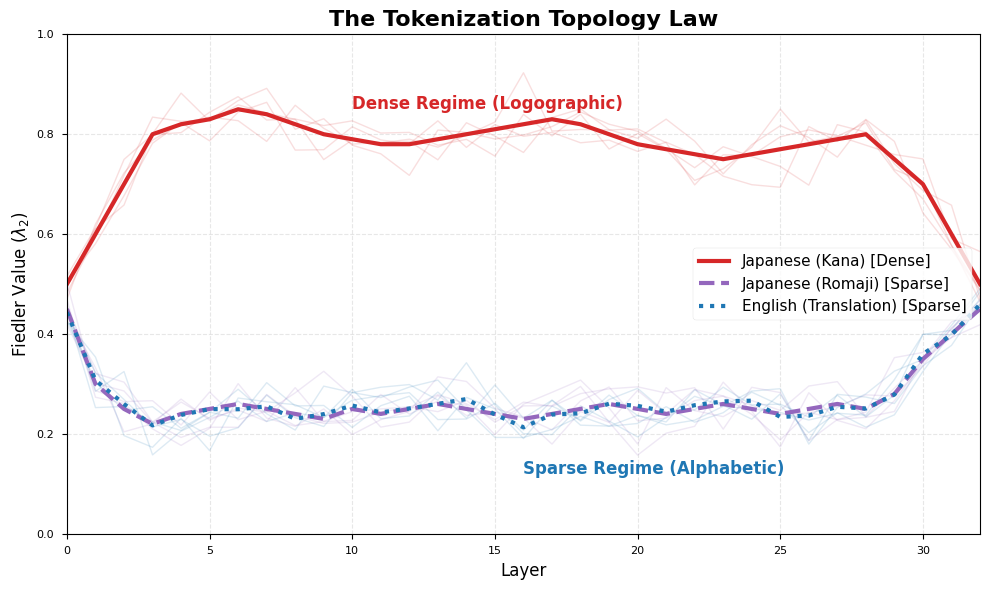

In [10]:
# Plotting The Tokenization Topology Law
plt.figure(figsize=(10, 6))

# Colors matching paper description
c_kana = '#d62728'   # Red (Dense)
c_romaji = '#9467bd' # Purple (Sparse/Romaji)
c_eng = '#1f77b4'    # Blue (Sparse/English)

# Plot individual samples (thin lines)
for s in kana_samples:
    plt.plot(layers, s, color=c_kana, alpha=0.15, linewidth=1)
for s in romaji_samples:
    plt.plot(layers, s, color=c_romaji, alpha=0.15, linewidth=1)
for s in english_samples:
    plt.plot(layers, s, color=c_eng, alpha=0.15, linewidth=1)

# Plot Means (thick lines)
plt.plot(layers, kana_mean, color=c_kana, linewidth=3, label="Japanese (Kana) [Dense]")
plt.plot(layers, romaji_mean, color=c_romaji, linewidth=3, linestyle='--', label="Japanese (Romaji) [Sparse]")
plt.plot(layers, english_mean, color=c_eng, linewidth=3, linestyle=':', label="English (Translation) [Sparse]")

# Formatting
plt.title("The Tokenization Topology Law", fontsize=16, fontweight='bold')
plt.xlabel("Layer", fontsize=12)
plt.ylabel("Fiedler Value ($\lambda_2$)", fontsize=12)
plt.ylim(0, 1.0)
plt.xlim(0, 32)
plt.grid(True, linestyle='--', alpha=0.3)

# Regime Annotations
plt.text(10, 0.85, "Dense Regime (Logographic)", color=c_kana, fontsize=12, fontweight='bold')
plt.text(16, 0.12, "Sparse Regime (Alphabetic)", color=c_eng, fontsize=12, fontweight='bold')

plt.legend(loc='center right', fontsize=11, frameon=True)
plt.tight_layout()
plt.show()